In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
SP_all_daily = pd.read_csv('SP_all_daily.csv')
SP_all_daily = SP_all_daily.set_index('Date')
SP_all_daily.head()

,S&P_Open,S&P_Close,S&P_Volume,Close_t-1,return(%),return_class,Close_t+1,t+1_return_class,t_3m_Close,t_10y_Close,...,Nk_Close,Nk_Volume,fx_Price,fx_change%,vo_Open,vo_Close,Year,Month,Day,Dayofweek
Date,,,,,,,,,,,,,,,,,,,,,
2022-09-02,3994.66,3924.26,4.134920e+09,3966.85,-1.073648,0,NaN,NaN,2.860,3.133,...,27650.839844,58800000.0,1.3132,-0.15,25.510000,25.469999,2022,9,2,4
2022-09-01,3936.73,3966.85,3.754570e+09,3955.00,0.299621,1,3924.26,0.0,2.860,3.133,...,27661.470703,68900000.0,1.3152,0.19,26.879999,25.559999,2022,9,1,3
2022-08-31,4000.67,3955.00,3.797860e+09,3986.16,-0.781705,0,3966.85,1.0,2.860,3.133,...,28091.529297,86200000.0,1.3127,0.27,25.860001,25.870001,2022,8,31,2
2022-08-30,4041.25,3986.16,3.190580e+09,4030.61,-1.102811,0,3955.00,0.0,2.873,3.110,...,28195.580078,60700000.0,1.3092,0.62,25.750000,26.209999,2022,8,30,1
2022-08-29,4034.58,4030.61,2.963020e+09,4057.66,-0.666640,0,3986.16,0.0,2.798,3.110,...,27878.960938,64100000.0,1.3011,-0.17,26.860001,26.209999,2022,8,29,0


In [3]:
SP_all_monthly = pd.read_csv('SP_all_monthly.csv')
#SP_all_monthly = SP_all_monthly.set_index('year_month')
SP_all_monthly = SP_all_monthly.dropna()

In [4]:
SP_all_monthly['year_month'] = pd.to_datetime(SP_all_monthly.year_month)
SP_all_monthly = SP_all_monthly.sort_values('year_month', ascending=True, ignore_index=True)
SP_all_monthly['Year'] = SP_all_monthly['year_month'].dt.year
SP_all_monthly['Month'] = SP_all_monthly['year_month'].dt.month 
SP_all_monthly

,year_month,S&P_Open,S&P_Close,S&P_Volume,Close_t-1,return(%),return_class,Close_t+1,t+1_return(%),t+1_return_class,...,Nk_Close,Nk_Volume,fx_Price,fx_change%,vo_Open,vo_Close,Div_Ratio,CS_Index,Year,Month
0,1985-02-01,179.63,181.18,2.194620e+09,179.63,0.862885,1,180.66,-0.287007,1.0,...,12321.919922,0,1.3835,4.24,24.870001,21.990000,21.29,93.7,1985,2
1,1985-03-01,181.18,180.66,2.153090e+09,181.18,-0.287007,1,179.83,-0.459427,1.0,...,12580.759766,0,1.3675,-1.16,24.870001,21.990000,21.33,93.7,1985,3
2,1985-04-01,180.66,179.83,1.981880e+09,180.66,-0.459427,1,189.55,5.405105,2.0,...,12426.290039,0,1.3670,-0.04,24.870001,21.990000,21.30,94.6,1985,4
3,1985-05-01,179.83,189.55,2.350340e+09,179.83,5.405105,2,191.85,1.213400,1.0,...,12758.459961,0,1.3745,0.55,24.870001,21.990000,21.30,91.8,1985,5
4,1985-06-01,189.55,191.85,2.117000e+09,189.55,1.213400,1,190.92,-0.484754,1.0,...,12882.089844,0,1.3592,-1.11,24.870001,21.990000,21.31,96.5,1985,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
446,2022-04-01,4540.32,4131.93,7.478485e+10,4530.41,-8.795672,0,4132.15,0.005324,1.0,...,26847.900391,1345900000,1.2856,2.86,20.620001,33.400002,64.21,65.2,2022,4
447,2022-05-01,4130.61,4132.15,8.912813e+10,4131.93,0.005324,1,3785.38,-8.391999,0.0,...,27279.800781,1582900000,1.2644,-1.65,33.349998,26.190001,64.20,58.4,2022,5
448,2022-06-01,4149.78,3785.38,8.679906e+10,4132.15,-8.391999,0,4130.29,9.111635,2.0,...,26393.039063,1637700000,1.2872,1.80,26.049999,28.709999,64.01,50.0,2022,6
449,2022-07-01,3781.00,4130.29,6.802114e+10,3785.38,9.111635,2,3955.00,-4.244012,0.0,...,27801.640625,1339300000,1.2793,-0.61,29.530001,21.330000,64.01,51.5,2022,7


## Exploratory Data Analysis

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,
         1.,  0.,  2.,  0.,  2.,  7.,  6.,  3.,  5.,  7.,  7.,  7.,  7.,
        15., 17., 32., 16., 22., 31., 46., 38., 31., 24., 35., 18., 18.,
        14.,  7., 11.,  5.,  5.,  4.,  0.,  2.,  1.,  0.,  2.]),
 array([-21.7630426 , -21.06424787, -20.36545313, -19.6666584 ,
        -18.96786367, -18.26906893, -17.5702742 , -16.87147947,
        -16.17268473, -15.47389   , -14.77509527, -14.07630054,
        -13.3775058 , -12.67871107, -11.97991634, -11.2811216 ,
        -10.58232687,  -9.88353214,  -9.1847374 ,  -8.48594267,
         -7.78714794,  -7.0883532 ,  -6.38955847,  -5.69076374,
         -4.991969  ,  -4.29317427,  -3.59437954,  -2.8955848 ,
         -2.19679007,  -1.49799534,  -0.79920061,  -0.10040587,
          0.59838886,   1.29718359,   1.99597833,   2.69477306,
          3.39356779,   4.09236253,   4.79115726,   5.48995199,
          6.18874673,   6.88754146,   7.58633619,   8.28513093,
          8.

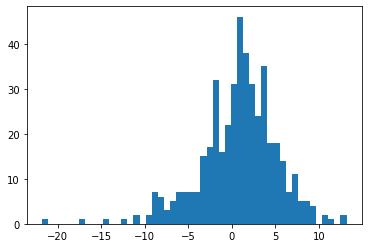

In [5]:
plt.hist(SP_all_monthly['return(%)'], bins = 50)

In [6]:
SP_all_monthly[SP_all_monthly['return_class']==1].describe()

,S&P_Open,S&P_Close,S&P_Volume,Close_t-1,return(%),return_class,Close_t+1,t+1_return(%),t+1_return_class,t_3m_Close,...,Nk_Close,Nk_Volume,fx_Price,fx_change%,vo_Open,vo_Close,Div_Ratio,CS_Index,Year,Month
count,245.000000,245.000000,2.450000e+02,245.000000,245.000000,245.0,245.00000,245.000000,245.000000,245.000000,...,245.000000,2.450000e+02,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000
mean,1298.550408,1304.124122,4.127580e+10,1297.671633,0.370560,1.0,1313.75951,0.763658,1.142857,3.028841,...,17911.259016,1.345517e+09,1.255625,0.046082,18.481021,17.940367,36.071592,88.063673,2003.502041,6.575510
std,928.313247,935.374106,3.401013e+10,926.593389,1.631910,0.0,945.06310,4.312185,0.646555,2.567576,...,6333.505704,1.392627e+09,0.146621,1.827818,6.288261,5.403411,13.467208,10.425655,10.696876,3.391076
min,179.630000,179.830000,1.923200e+09,179.630000,-2.894410,1.0,179.83000,-21.763043,0.000000,0.003000,...,7972.709961,0.000000e+00,0.943900,-4.820000,9.590000,9.510000,21.290000,58.400000,1985.000000,1.000000
25%,456.500000,458.930000,5.852670e+09,456.500000,-0.908145,1.0,461.79000,-1.679083,1.000000,0.315000,...,12969.049805,0.000000e+00,1.162500,-1.080000,13.460000,13.700000,26.130000,81.800000,1993.000000,4.000000
50%,1191.500000,1191.330000,3.151100e+10,1191.500000,0.694894,1.0,1191.33000,1.220903,1.000000,2.900000,...,17287.650391,1.347900e+09,1.268600,-0.020000,16.680000,16.629999,29.670000,90.700000,2004.000000,6.000000
75%,1758.700000,1805.810000,7.310381e+10,1756.540000,1.787319,1.0,1782.59000,3.443197,2.000000,4.990000,...,21205.810547,2.486300e+09,1.354000,1.070000,23.780001,21.990000,44.230000,94.700000,2013.000000,10.000000
max,4610.620000,4567.000000,1.310440e+11,4605.380000,2.995202,1.0,4766.18000,13.176694,2.000000,8.660000,...,38915.871094,7.190600e+09,1.601500,6.590000,60.470001,40.000000,68.590000,111.300000,2022.000000,12.000000


In [7]:
SP_all_monthly[SP_all_monthly['return_class']==0].describe()

,S&P_Open,S&P_Close,S&P_Volume,Close_t-1,return(%),return_class,Close_t+1,t+1_return(%),t+1_return_class,t_3m_Close,...,Nk_Close,Nk_Volume,fx_Price,fx_change%,vo_Open,vo_Close,Div_Ratio,CS_Index,Year,Month
count,72.000000,72.000000,7.200000e+01,72.000000,72.000000,72.0,72.000000,72.000000,72.000000,72.000000,...,72.000000,7.200000e+01,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000
mean,1513.509722,1417.736944,5.390509e+10,1511.973611,-6.393209,0.0,1432.208611,0.981012,1.180556,2.941083,...,16989.008274,1.334639e+09,1.296603,1.853194,22.940278,27.499722,37.123889,84.643056,2004.708333,6.166667
std,1163.546699,1093.427319,4.416853e+10,1160.983618,3.346310,0.0,1117.915011,5.808466,0.737838,2.450305,...,6450.691630,1.353960e+09,0.177605,2.463475,8.542040,9.286080,14.647806,15.937915,10.770902,3.427314
min,188.630000,182.080000,1.860160e+09,188.630000,-21.763043,0.0,189.820000,-16.942453,0.000000,0.003000,...,7568.419922,0.000000e+00,0.977700,-1.920000,10.810000,14.870000,21.450000,50.000000,1985.000000,1.000000
25%,883.015000,800.740000,1.316447e+10,883.907500,-8.178652,0.0,800.472500,-2.304695,1.000000,0.425750,...,11309.300293,0.000000e+00,1.151875,0.370000,17.170000,21.990000,26.390000,73.400000,1997.000000,3.000000
50%,1215.175000,1132.500000,4.827078e+10,1215.060000,-5.712835,0.0,1117.955000,0.898190,1.000000,2.267500,...,17379.300782,1.354150e+09,1.313100,1.685000,22.410000,24.935001,29.670000,89.200000,2005.000000,7.000000
75%,1581.697500,1519.097500,8.638498e+10,1583.467500,-3.915781,0.0,1525.880000,5.354749,2.000000,5.032500,...,21023.365235,2.693550e+09,1.399300,2.595000,25.157500,29.962500,40.632500,96.875000,2012.250000,9.000000
max,4778.140000,4515.550000,1.618011e+11,4766.180000,-3.004506,0.0,4605.380000,12.684410,2.000000,7.530000,...,37188.949219,4.267300e+09,1.586900,13.900000,60.169998,59.889999,68.390000,112.000000,2022.000000,12.000000


In [8]:
SP_all_monthly[SP_all_monthly['return_class']==-1].describe()

,S&P_Open,S&P_Close,S&P_Volume,Close_t-1,return(%),return_class,Close_t+1,t+1_return(%),t+1_return_class,t_3m_Close,...,Nk_Close,Nk_Volume,fx_Price,fx_change%,vo_Open,vo_Close,Div_Ratio,CS_Index,Year,Month
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# Let's try with only after 1986 data 
SP_all_monthly = SP_all_monthly[SP_all_monthly['year_month'] >= '1986-01-01']

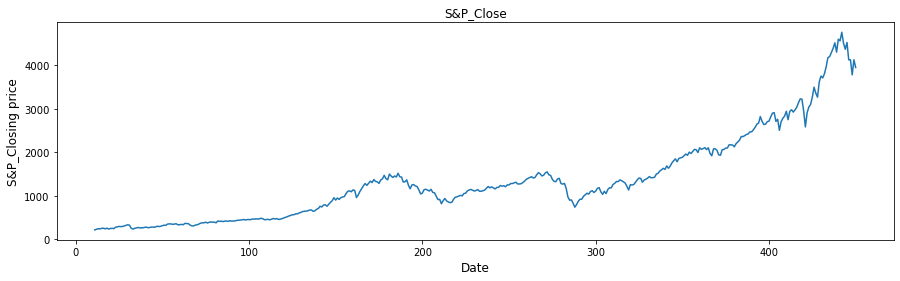

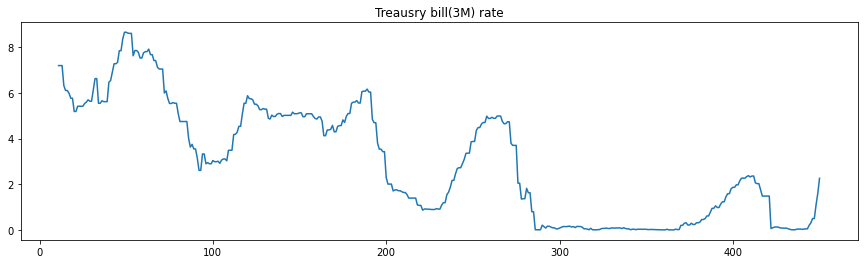

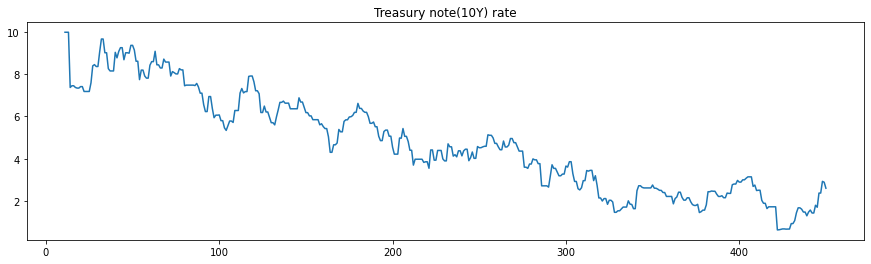

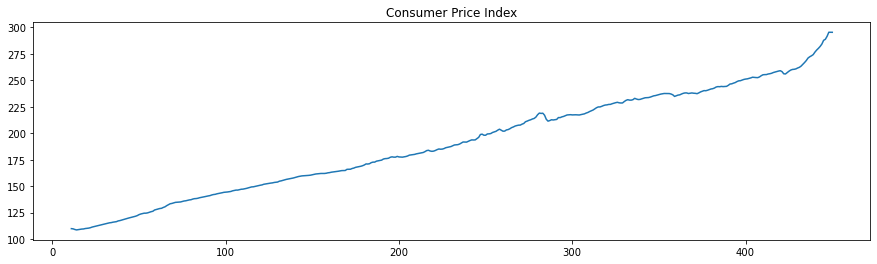

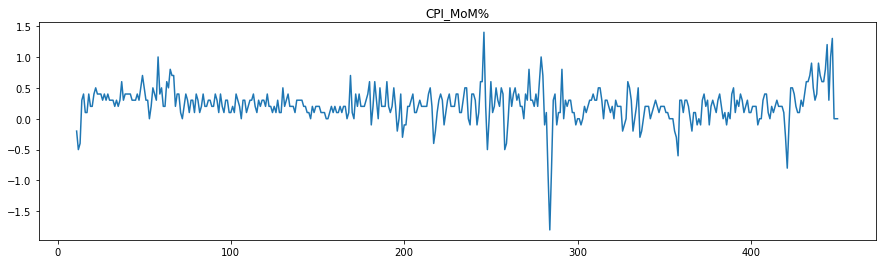

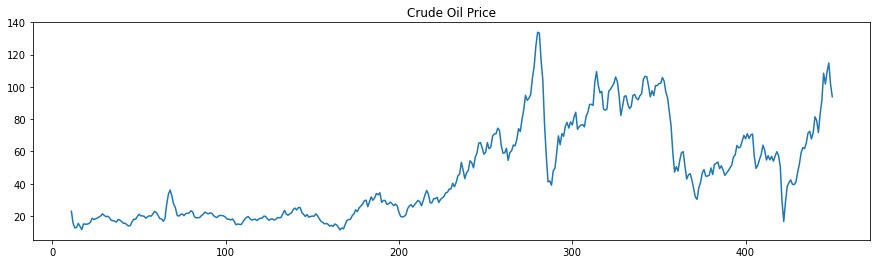

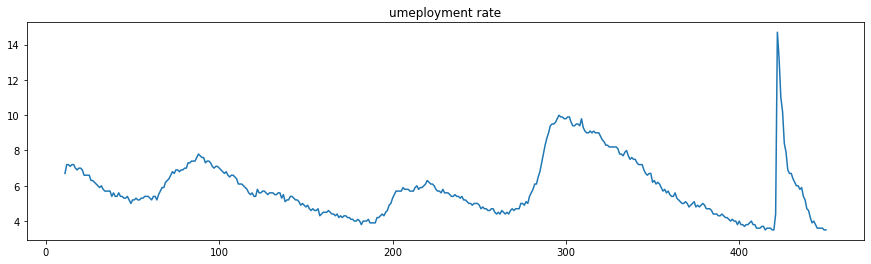

In [10]:
#visualize the data
plt.figure(figsize=(15,4))
plt.title('S&P_Close')
plt.xlabel('Date',fontsize=12)
plt.ylabel('S&P_Closing price',fontsize=12)
plt.plot(SP_all_monthly['S&P_Close'])
plt.show()

plt.figure(figsize=(15,4))
plt.title('Treausry bill(3M) rate')
plt.plot(SP_all_monthly['t_3m_Close'])
plt.show()

plt.figure(figsize=(15,4))
plt.title('Treasury note(10Y) rate')
plt.plot(SP_all_monthly['t_10y_Close'])
plt.show()

plt.figure(figsize=(15,4))
plt.title('Consumer Price Index')
plt.plot(SP_all_monthly['cpi_Value'])
plt.show()

plt.figure(figsize=(15,4))
plt.title('CPI_MoM%')
plt.plot(SP_all_monthly['cpi_MoM%'])
plt.show()

plt.figure(figsize=(15,4))
plt.title('Crude Oil Price')
plt.plot(SP_all_monthly['oil_Price'])
plt.show()

plt.figure(figsize=(15,4))
plt.title('umeployment rate')
plt.plot(SP_all_monthly['unemp_rate'])
plt.show()


Below is useful - 3m_treasury bill rate

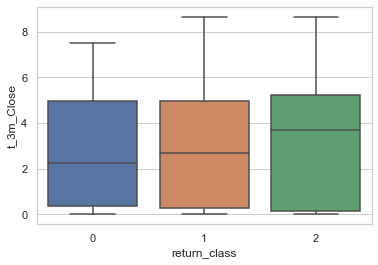

In [11]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x='return_class', y='t_3m_Close', data=SP_all_monthly)

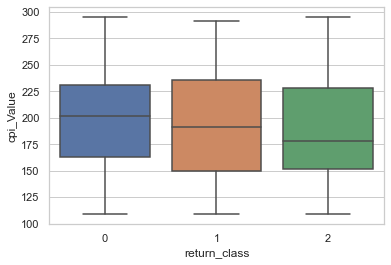

In [12]:
ax = sns.boxplot(x='return_class', y='cpi_Value', data=SP_all_monthly)

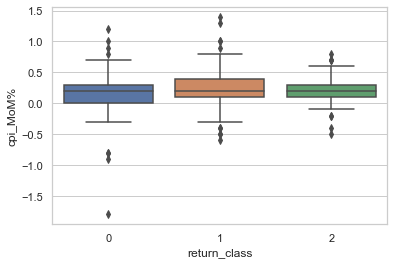

In [13]:
ax = sns.boxplot(x='return_class', y='cpi_MoM%', data=SP_all_monthly)

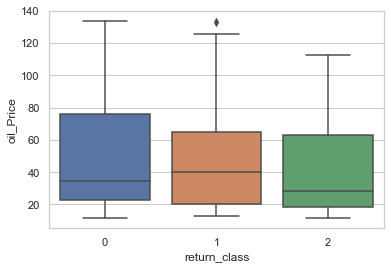

In [14]:
ax = sns.boxplot(x='return_class', y='oil_Price', data=SP_all_monthly)

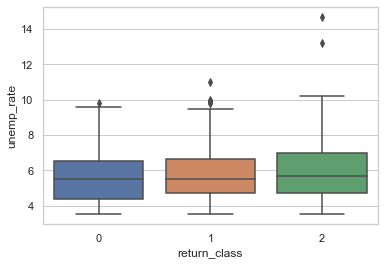

In [15]:
ax = sns.boxplot(x='return_class', y='unemp_rate', data=SP_all_monthly)

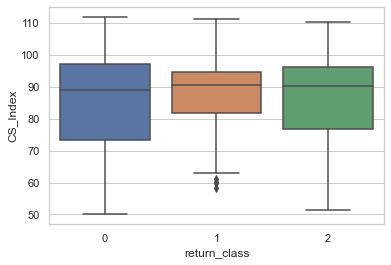

In [16]:
ax = sns.boxplot(x='return_class', y='CS_Index', data=SP_all_monthly)

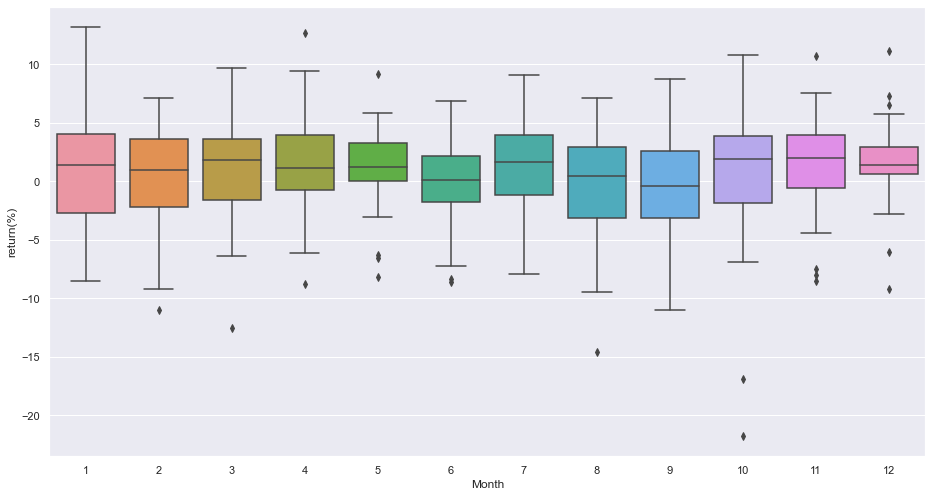

In [17]:
# Monthly S&P index return
sns.set(rc={'figure.figsize':(15.7,8.27)})
ax = sns.boxplot(x='Month', y='return(%)', data=SP_all_monthly)

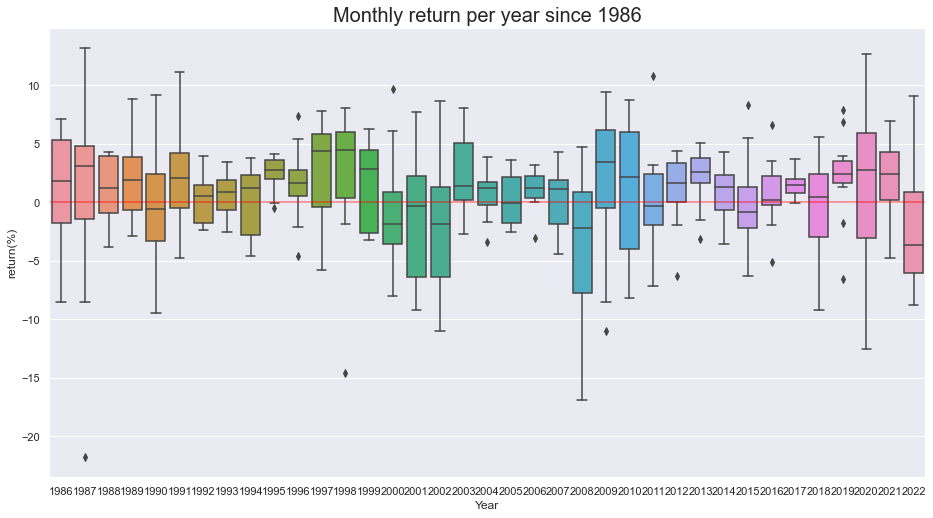

In [33]:
# Monthly S&P Index return per year 
sns.set(rc={'figure.figsize':(15.7,8.27)})
ax = sns.boxplot(x='Year', y='return(%)', data=SP_all_monthly)
ax.set_title('Monthly return per year since 1986', fontsize = 20)
ax.axhline(y=0, color ='red', alpha = 0.5)

August 1982 - October 1987 : annualized return 17.6% 
October 19, 1987 market crash a.k.a. Black Monday
2000 dot-com bubble burst
2008 - 2009 financial crisis 


In [19]:
SP_all_monthly.tail()

,year_month,S&P_Open,S&P_Close,S&P_Volume,Close_t-1,return(%),return_class,Close_t+1,t+1_return(%),t+1_return_class,...,Nk_Close,Nk_Volume,fx_Price,fx_change%,vo_Open,vo_Close,Div_Ratio,CS_Index,Year,Month
446,2022-04-01,4540.32,4131.93,7.478485e+10,4530.41,-8.795672,0,4132.15,0.005324,1.0,...,26847.900391,1345900000,1.2856,2.86,20.620001,33.400002,64.21,65.2,2022,4
447,2022-05-01,4130.61,4132.15,8.912813e+10,4131.93,0.005324,1,3785.38,-8.391999,0.0,...,27279.800781,1582900000,1.2644,-1.65,33.349998,26.190001,64.20,58.4,2022,5
448,2022-06-01,4149.78,3785.38,8.679906e+10,4132.15,-8.391999,0,4130.29,9.111635,2.0,...,26393.039063,1637700000,1.2872,1.80,26.049999,28.709999,64.01,50.0,2022,6
449,2022-07-01,3781.00,4130.29,6.802114e+10,3785.38,9.111635,2,3955.00,-4.244012,0.0,...,27801.640625,1339300000,1.2793,-0.61,29.530001,21.330000,64.01,51.5,2022,7
450,2022-08-01,4112.38,3955.00,7.808852e+10,4130.29,-4.244012,0,3908.19,-1.183565,1.0,...,28091.529297,1397800000,1.3127,2.61,22.410000,25.870001,64.01,51.5,2022,8


## First base line model 

#### Feature Engineering

#### modeling

In [20]:
# 1. scaling
# 2. building a model (Logistic Regression, Naive Bayes, Decision Tree/Random Forest, SVM, KNN?)

In [21]:
X = SP_all_monthly.drop(['year_month','Year','Month','Close_t+1','return_class'], axis=1)
y = SP_all_monthly.return_class

In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[0.00000000e+00, 0.00000000e+00, 1.44107154e-03, ...,
        2.47717353e-01, 0.00000000e+00, 7.35483871e-01],
       [1.09484416e-04, 3.32425786e-03, 1.56726973e-03, ...,
        2.47717353e-01, 3.58120918e-03, 7.40322581e-01],
       [3.42467253e-03, 5.95468119e-03, 3.54912784e-03, ...,
        2.47717353e-01, 8.00505582e-03, 7.27419355e-01],
       ...,
       [8.62408745e-01, 7.84647813e-01, 5.28596799e-01, ...,
        3.81103600e-01, 8.96355593e-01, 0.00000000e+00],
       [7.81657419e-01, 8.60378974e-01, 4.10640624e-01, ...,
        2.34616916e-01, 8.96355593e-01, 2.41935484e-02],
       [8.54219310e-01, 8.21890919e-01, 4.73880304e-01, ...,
        3.24732063e-01, 8.96355593e-01, 2.41935484e-02]])

In [23]:
# Data Splitting 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=27)

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.metrics import precision_recall_fscore_support, f1_score, accuracy_score

logreg_clf = LogisticRegression(multi_class = 'multinomial')
LDA_clf = LinearDiscriminantAnalysis()
KNN_clf = KNeighborsClassifier()
NB_clf = GaussianNB()
DT_clf = DecisionTreeClassifier()
SVM_clf = SVC()
xgb_cl = xgb.XGBClassifier()

In [25]:
# Logistic regression
logreg_clf.fit(X_train,y_train)
y_pred = logreg_clf.predict(X_test)

C:\Users\Irene\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [26]:
accuracy = accuracy_score(y_test, y_pred)
score = precision_recall_fscore_support(y_test, y_pred, average='weighted')
print(f'accuracy score: {accuracy}')
print(f'Test set precision, recall, f-score: {score}')

accuracy score: 0.7636363636363637
Test set precision, recall, f-score: (0.8010327022375215, 0.7636363636363637, 0.7451784827874492, None)


In [27]:
# LDA 
LDA_clf.fit(X_train,y_train)
y_pred_LDA = LDA_clf.predict(X_test)

In [28]:
accuracy = accuracy_score(y_test, y_pred_LDA)
score = precision_recall_fscore_support(y_test, y_pred_LDA, average='weighted')
print(f'accuracy score: {accuracy}')
print(f'Test set precision, recall, f-score: {score}')

accuracy score: 0.8545454545454545
Test set precision, recall, f-score: (0.8772409408773046, 0.8545454545454545, 0.8486827709140082, None)


In [29]:
# KNN
KNN_clf.fit(X_train,y_train)
y_pred_KNN = KNN_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_KNN)
score = precision_recall_fscore_support(y_test, y_pred_KNN, average='weighted')
print(f'accuracy score: {accuracy}')
print(f'Test set precision, recall, f-score: {score}')

AttributeError: 'NoneType' object has no attribute 'split'

In [ ]:
# Naive Bayes
NB_clf.fit(X_train,y_train)
y_pred_NB = NB_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_NB)
score = precision_recall_fscore_support(y_test, y_pred_NB, average='weighted')
print(f'accuracy score: {accuracy}')
print(f'Test set precision, recall, f-score: {score}')

In [ ]:
# Decision Tree
DT_clf.fit(X_train,y_train)
y_pred_DT = DT_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_DT)
score = precision_recall_fscore_support(y_test, y_pred_DT, average='weighted')
print(f'accuracy score: {accuracy}')
print(f'Test set precision, recall, f-score: {score}')

In [ ]:
# XGBoost
xgb_cl.fit(X_train,y_train)
y_pred_xgb = xgb_cl.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_xgb)
score = precision_recall_fscore_support(y_test, y_pred_xgb, average='weighted')
print(f'accuracy score: {accuracy}')
print(f'Test set precision, recall, f-score: {score}')

In [ ]:
SVM_clf.fit(X_train,y_train)
y_pred_SVM = SVM_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_SVM)
score = precision_recall_fscore_support(y_test, y_pred_SVM, average='weighted')
print(f'accuracy score: {accuracy}')
print(f'Test set precision, recall, f-score: {score}')